In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [30]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)
mode_value = df['sex'].mode()[0]
df['sex'].fillna(mode_value,inplace=True)

In [31]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [24]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [38]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [34]:
df.corr()

<ipython-input-34-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


<ipython-input-35-87f900721a46>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['culmen_length_mm'])


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

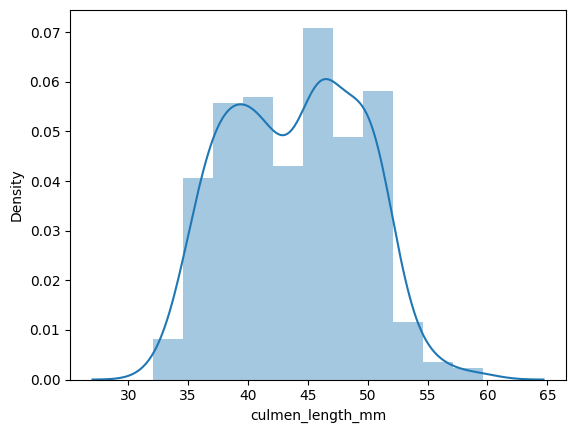

In [35]:
sns.distplot(df['culmen_length_mm'])

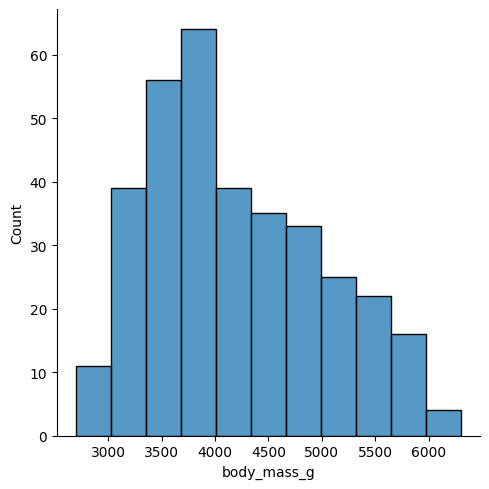

In [36]:
sns.displot(df['body_mass_g'])

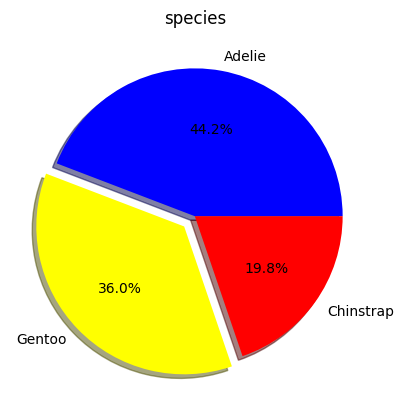

In [37]:
plt.pie(df.species.value_counts(),[0,0.1,0],labels=["Adelie","Gentoo","Chinstrap"],autopct='%1.1f%%', shadow = True,colors = ["blue","yellow","red"])
plt.title("species")
plt.show()

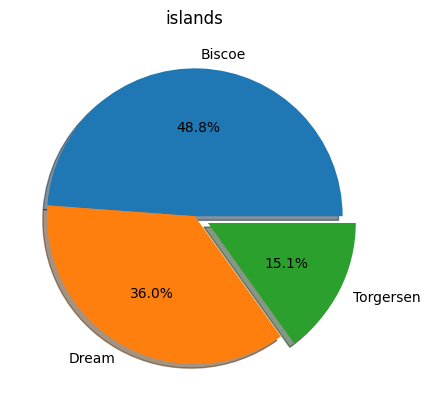

In [58]:
plt.pie(df.island.value_counts(),[0,0,0.1],labels=["Biscoe","Dream","Torgersen"],autopct='%1.1f%%', shadow = True)
plt.title("islands")
plt.show()

<Axes: ylabel='sex'>

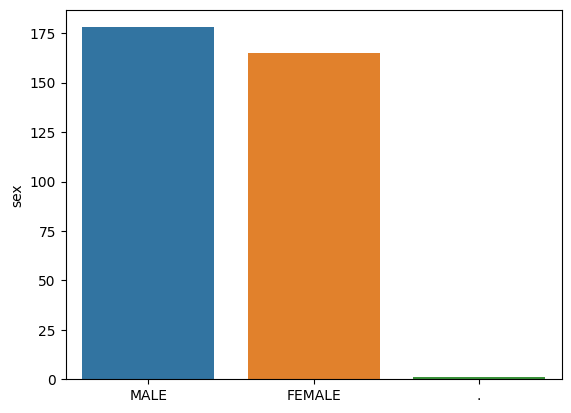

In [41]:
sns.barplot(x=df.sex.value_counts().index,y=df.sex.value_counts())

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

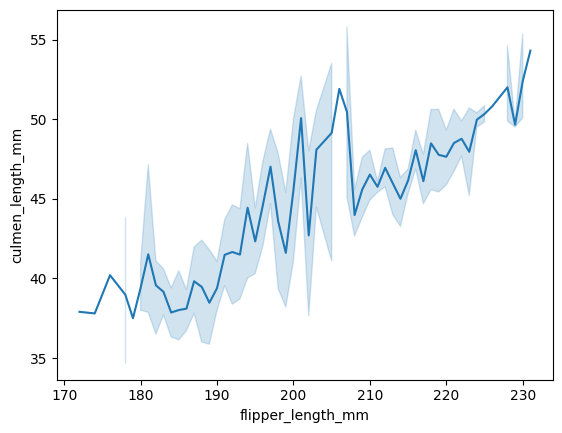

In [47]:
sns.lineplot(x=df.flipper_length_mm,y=df.culmen_length_mm)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

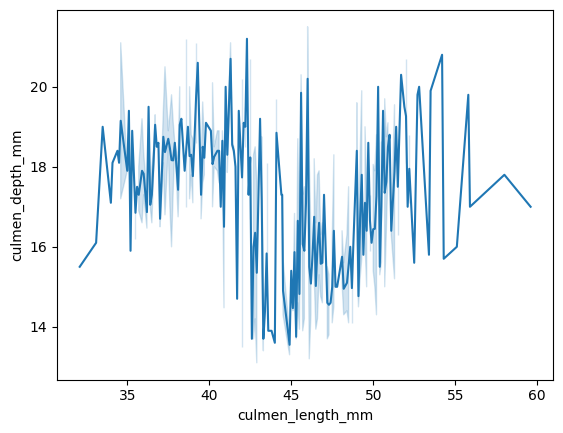

In [46]:
sns.lineplot(x=df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

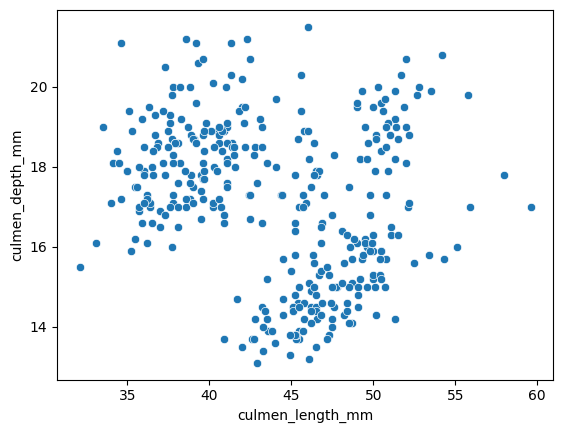

In [48]:
sns.scatterplot(x=df.culmen_length_mm,y=df.culmen_depth_mm)

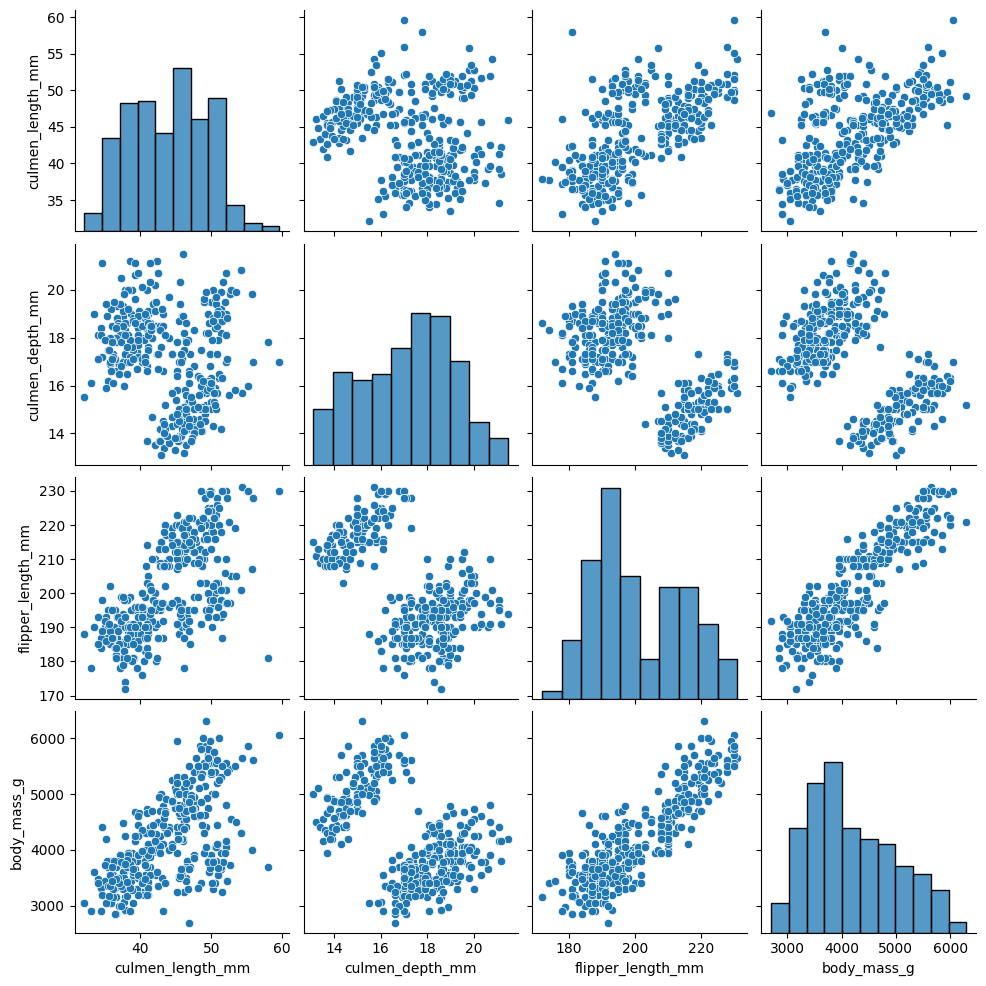

In [49]:
sns.pairplot(df)

<ipython-input-50-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

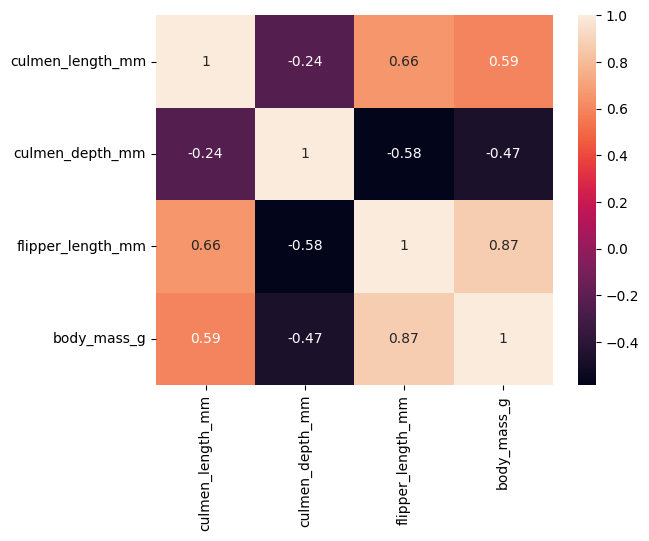

In [50]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

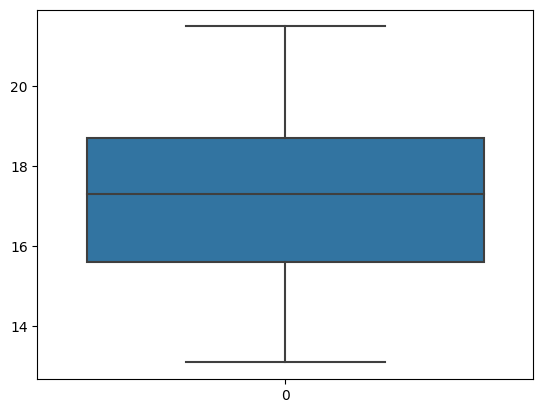

In [52]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

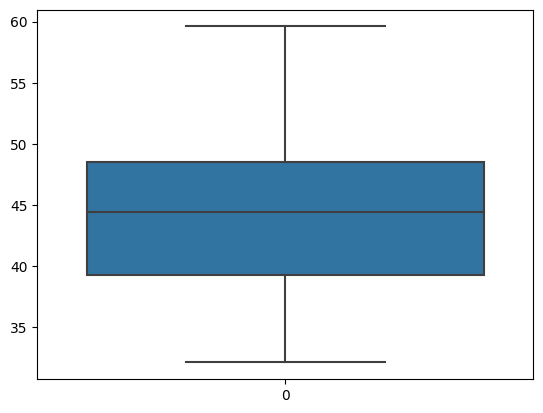

In [53]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

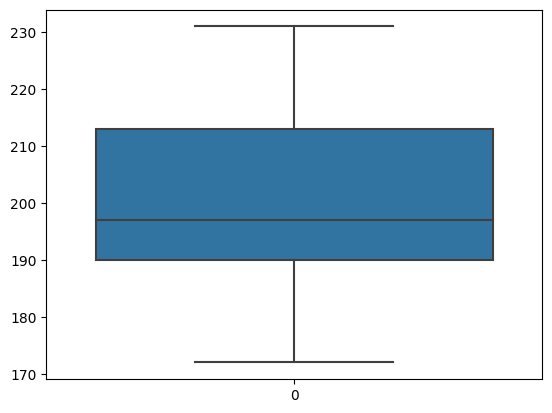

In [54]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

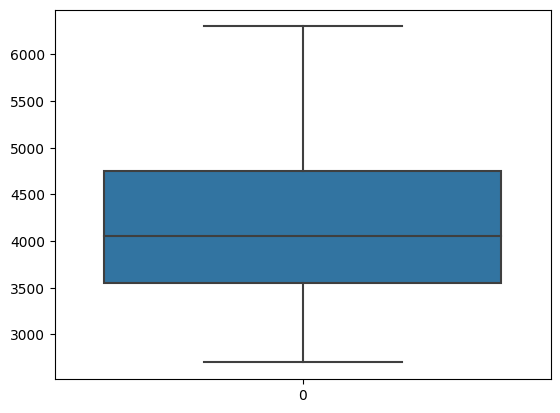

In [55]:
sns.boxplot(df.body_mass_g)

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
df.species = le.fit_transform(df.species)
df.island = le.fit_transform(df.island)
df.sex = le.fit_transform(df.sex)

In [64]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


In [66]:
y = df['sex']
y.head()

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int64

In [68]:
x = df.drop(columns=['sex'],axis=1)
x

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.10,18.7,181.0,3750.0
1,0,2,39.50,17.4,186.0,3800.0
2,0,2,40.30,18.0,195.0,3250.0
3,0,2,44.45,17.3,197.0,4050.0
4,0,2,36.70,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,2,0,44.45,17.3,197.0,4050.0
340,2,0,46.80,14.3,215.0,4850.0
341,2,0,50.40,15.7,222.0,5750.0
342,2,0,45.20,14.8,212.0,5200.0


In [70]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [71]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.0,1.0,0.254545,0.666667,0.152542,0.291667
1,0.0,1.0,0.269091,0.511905,0.237288,0.305556
2,0.0,1.0,0.298182,0.583333,0.389831,0.152778
3,0.0,1.0,0.449091,0.500000,0.423729,0.375000
4,0.0,1.0,0.167273,0.738095,0.355932,0.208333


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [75]:
x_train.shape

(275, 6)

In [76]:
x_test.shape

(69, 6)

In [77]:
y_train.shape

(275,)

In [78]:
y_test.shape

(69,)